# Introduction

* The World Happiness Report is a landmark survey of the state of global happiness.
* The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions.
* Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations.
* The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

# Python Libraries

In [1]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px     

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings("ignore")

/kaggle/input/world-happiness-report-2022/World Happiness Report 2022.csv
/kaggle/input/world-happiness-report-2021/world-happiness-report-2021.csv
/kaggle/input/world-happiness-report-2021/world-happiness-report.csv


# Read Data

In [2]:
df = pd.read_csv("/kaggle/input/world-happiness-report-2022/World Happiness Report 2022.csv")
df.head()

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534
1,2,Denmark,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532
2,3,Iceland,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191
3,4,Switzerland,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,0.461
4,5,Netherlands,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,0.271,0.419


In [3]:
df.tail()

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
141,142,Botswana*,3.471,3.667,3.275,0.187,1.503,0.815,0.280,0.571,0.012,0.102
142,143,Rwanda*,3.268,3.462,3.074,0.536,0.785,0.133,0.462,0.621,0.187,0.544
143,144,Zimbabwe,2.995,3.110,2.880,0.548,0.947,0.690,0.270,0.329,0.106,0.105
144,145,Lebanon,2.955,3.049,2.862,0.216,1.392,0.498,0.631,0.103,0.082,0.034
145,146,Afghanistan,2.404,2.469,2.339,1.263,0.758,0.000,0.289,0.000,0.089,0.005


# Data Content

Information is presented for 146 countries and 12 indicators of living standards and happiness.


Let's describe our feature space.

**RANK** - number in the ranking of countries.

**Country** - researched country.

**Happiness score** - an index that reflects the well-being of people and the state of the environment in different countries of the world, which was proposed by the New Economics Foundation in July 2006.

**Whisker-high and Whisker-low** - Whisker (low) is the quartile (real number between 0 and 10) from which the happiness score is calculated.

**Dystopia (1.83) + residual** - It has values equal to the world’s lowest national averages. Dystopia as a benchmark against which to compare contributions from each of the six factors. Dystopia is an imaginary country that has the world's least-happy people. ... Since life would be very unpleasant in a country with the world's lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom, and least social support, it is referred to as “Dystopia,” in contrast to Utopia

**Explained by: GDP per capita** is the ratio of GDP to the population of the country, which shows how much of the gross product produced in the country in a year and expressed in value terms, falls on one inhabitant of this country.

**Explained by: Social support** is a form of expression of the social policy of the state, aimed at providing social assistance to needy citizens.

**Explained by: Healthy life expectancy** - Healthy life expectancy is an indicator for calculating which life expectancy must be adjusted for the health of the individual. This indicator represents the period of time (years, months, days) during which an individual is expected to have a certain state of health, with a constant level of mortality and morbidity.

**Explained by: Freedom to make life choices** - the right of a person to freely express his opinion. This right includes freedom to hold opinions and freedom to receive and impart information and ideas without any interference from public authorities and regardless of frontiers.

**Explained by: Generosity** - The main feature of charity is the voluntary choice of the type, time and place, as well as the content of (targeted)
assistance. Charity is distinguished as a manifestation of compassion for one's neighbor and the moral duty of the possessor to rush to the aid of the have-not.

**Explained by: Perceptions of corruption** - an index compiled by the international non-governmental organization Transparency International to reflect the assessment of the level of perception of corruption by analysts and entrepreneurs on a 100-point scale. Compiled annually since 1995.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   RANK                                        146 non-null    int64  
 1   Country                                     146 non-null    object 
 2   Happiness score                             146 non-null    float64
 3   Whisker-high                                146 non-null    float64
 4   Whisker-low                                 146 non-null    float64
 5   Dystopia (1.83) + residual                  146 non-null    float64
 6   Explained by: GDP per capita                146 non-null    float64
 7   Explained by: Social support                146 non-null    float64
 8   Explained by: Healthy life expectancy       146 non-null    float64
 9   Explained by: Freedom to make life choices  146 non-null    float64
 10  Explained by: 

In [5]:
# Remove country rank.

df.drop('RANK',axis=1,inplace=True)

In [6]:
# let's arrange our columns
df.rename(columns = {'Dystopia (1.83) + residual':'Dystopia',
                     'Explained by: GDP per capita':'GDP per capita', 
                     'Explained by: Social support':'Social support',
                     'Explained by: Healthy life expectancy':'Healthy life expectancy',
                     'Explained by: Freedom to make life choices':'Freedom to make life choices',
                     'Explained by: Generosity':'Generosity',
                     'Explained by: Perceptions of corruption':'Perceptions of corruption'}, inplace = True)

In [7]:
# Let's divide the countries according to continents, for this we will use the previous year's data (world-happiness-report-2021)

In [8]:
df["Country"].unique()

array(['Finland', 'Denmark', 'Iceland', 'Switzerland', 'Netherlands',
       'Luxembourg*', 'Sweden', 'Norway', 'Israel', 'New Zealand',
       'Austria', 'Australia', 'Ireland', 'Germany', 'Canada',
       'United States', 'United Kingdom', 'Czechia', 'Belgium', 'France',
       'Bahrain', 'Slovenia', 'Costa Rica', 'United Arab Emirates',
       'Saudi Arabia', 'Taiwan Province of China', 'Singapore', 'Romania',
       'Spain', 'Uruguay', 'Italy', 'Kosovo', 'Malta', 'Lithuania',
       'Slovakia', 'Estonia', 'Panama', 'Brazil', 'Guatemala*',
       'Kazakhstan', 'Cyprus', 'Latvia', 'Serbia', 'Chile', 'Nicaragua',
       'Mexico', 'Croatia', 'Poland', 'El Salvador', 'Kuwait*', 'Hungary',
       'Mauritius', 'Uzbekistan', 'Japan', 'Honduras', 'Portugal',
       'Argentina', 'Greece', 'South Korea', 'Philippines', 'Thailand',
       'Moldova', 'Jamaica', 'Kyrgyzstan', 'Belarus*', 'Colombia',
       'Bosnia and Herzegovina', 'Mongolia', 'Dominican Republic',
       'Malaysia', 'Bolivia', 

## Dividing Countries Into Regions 

In [9]:
# Let's edit the 2022 dataset country names to pull continent information from the 2021 dataset 
country_name_dict = {"Luxembourg*": "Luxembourg", 
                    "Guatemala*": "Guatemala",
                    "Kuwait*": "Kuwait",
                    "Belarus*": "Belarus",
                    "Turkmenistan*": "Turkmenistan",
                    "North Cyprus*": "North Cyprus",
                    "Libya*": "Libya",
                    "Azerbaijan*": "Azerbaijan",
                    "Gambia*": "Gambia",
                    "Liberia*": "Liberia",
                    "Niger*": "Niger",
                    "Comoros*": "Comoros",
                    "Palestinian Territories*": "Palestinian Territories",
                    "Eswatini, Kingdom of*": "Eswatini, Kingdom of",
                    "Madagascar*": "Madagascar",
                    "Chad*": "Chad",
                    "Yemen*": "Yemen",
                    "Mauritania*": "Mauritania",
                    "Lesotho*": "Lesotho",
                    "Botswana*": "Botswana",
                    "Rwanda*": "Rwanda",}
df["Country"] = df["Country"].replace(country_name_dict)

In [10]:
# Read the data set for 2021
continents_df = pd.read_csv("../input/world-happiness-report-2021/world-happiness-report-2021.csv")

# In 2021, the regions corresponding to countries are kept together in the dictionary 
continents_dict = {k:v for k,v in zip(continents_df["Country name"],continents_df["Regional indicator"])}

# Create the region column in the 2022 data with the created dictionary
df["Region"] = df["Country"].map(continents_dict)

In [11]:
df["Region"].value_counts()

Sub-Saharan Africa                    33
Western Europe                        21
Latin America and Caribbean           19
Middle East and North Africa          17
Central and Eastern Europe            16
Commonwealth of Independent States    12
Southeast Asia                         9
East Asia                              6
South Asia                             6
North America and ANZ                  4
Name: Region, dtype: int64

In [12]:
# describe basic statistics of data

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Happiness score,146.0,5.553575,1.086843,2.404,4.88875,5.5685,6.30500,7.821
Whisker-high,146.0,5.673589,1.065621,2.469,5.00625,5.6800,6.44875,7.886
Whisker-low,146.0,5.433568,1.109380,2.339,4.75475,5.4530,6.19000,7.756
Dystopia,146.0,1.831808,0.534994,0.187,1.55525,1.8945,2.15300,2.844
GDP per capita,146.0,1.410445,0.421663,0.000,1.09550,1.4455,1.78475,2.209
Social support,146.0,0.905863,0.280122,0.000,0.73200,0.9575,1.11425,1.320
Healthy life expectancy,146.0,0.586171,0.176336,0.000,0.46325,0.6215,0.71975,0.942
Freedom to make life choices,146.0,0.517226,0.145859,0.000,0.44050,0.5435,0.62600,0.740
Generosity,146.0,0.147377,0.082799,0.000,0.08900,0.1325,0.19775,0.468
Perceptions of corruption,146.0,0.154781,0.127514,0.000,0.06825,0.1195,0.19850,0.587


# Observation of Missing Data

In [13]:
# Let's look at the missing values in the dataset.
df.isnull().sum()

Country                         0
Happiness score                 0
Whisker-high                    0
Whisker-low                     0
Dystopia                        0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
Region                          3
dtype: int64

In [14]:
df[df["Region"].isnull() == True]

,Country,Happiness score,Whisker-high,Whisker-low,Dystopia,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Region
17,Czechia,6.920,7.029,6.811,2.263,1.815,1.260,0.715,0.660,0.158,0.048,NaN
98,Congo,5.075,5.235,4.915,2.658,0.950,0.405,0.355,0.431,0.130,0.146,NaN
124,"Eswatini, Kingdom of",4.396,4.607,4.185,1.688,1.274,0.786,0.197,0.259,0.038,0.154,NaN


In [15]:
# I filled in lines 17 and 98, deleted line 124
df.loc[17,"Region"] = "Central and Eastern Europe"
df.loc[98,"Region"] = "Sub-Saharan Africa"
df.dropna(inplace = True)    # I deleted line 124

# Correlation 

In [16]:
df.corr()

,Happiness score,Whisker-high,Whisker-low,Dystopia,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Happiness score,1.000000,0.999343,0.999390,0.499097,0.764578,0.778288,0.739418,0.620946,0.054560,0.417820
Whisker-high,0.999343,1.000000,0.997468,0.514151,0.752751,0.773586,0.727166,0.619543,0.057091,0.415122
Whisker-low,0.999390,0.997468,1.000000,0.483915,0.775012,0.781899,0.750331,0.621601,0.052040,0.419965
Dystopia,0.499097,0.514151,0.483915,1.000000,-0.074073,0.082881,-0.011199,0.115684,0.064860,-0.051099
GDP per capita,0.764578,0.752751,0.775012,-0.074073,1.000000,0.722181,0.824790,0.459810,-0.168526,0.377713
Social support,0.778288,0.773586,0.781899,0.082881,0.722181,1.000000,0.672086,0.480769,-0.006307,0.223476
Healthy life expectancy,0.739418,0.727166,0.750331,-0.011199,0.824790,0.672086,1.000000,0.417650,-0.121169,0.368824
Freedom to make life choices,0.620946,0.619543,0.621601,0.115684,0.459810,0.480769,0.417650,1.000000,0.163329,0.406851
Generosity,0.054560,0.057091,0.052040,0.064860,-0.168526,-0.006307,-0.121169,0.163329,1.000000,0.096638
Perceptions of corruption,0.417820,0.415122,0.419965,-0.051099,0.377713,0.223476,0.368824,0.406851,0.096638,1.000000


In [17]:
df.corr()["Happiness score"]

Happiness score                 1.000000
Whisker-high                    0.999343
Whisker-low                     0.999390
Dystopia                        0.499097
GDP per capita                  0.764578
Social support                  0.778288
Healthy life expectancy         0.739418
Freedom to make life choices    0.620946
Generosity                      0.054560
Perceptions of corruption       0.417820
Name: Happiness score, dtype: float64

As we can see, most features have a positive correlation with the target variable.

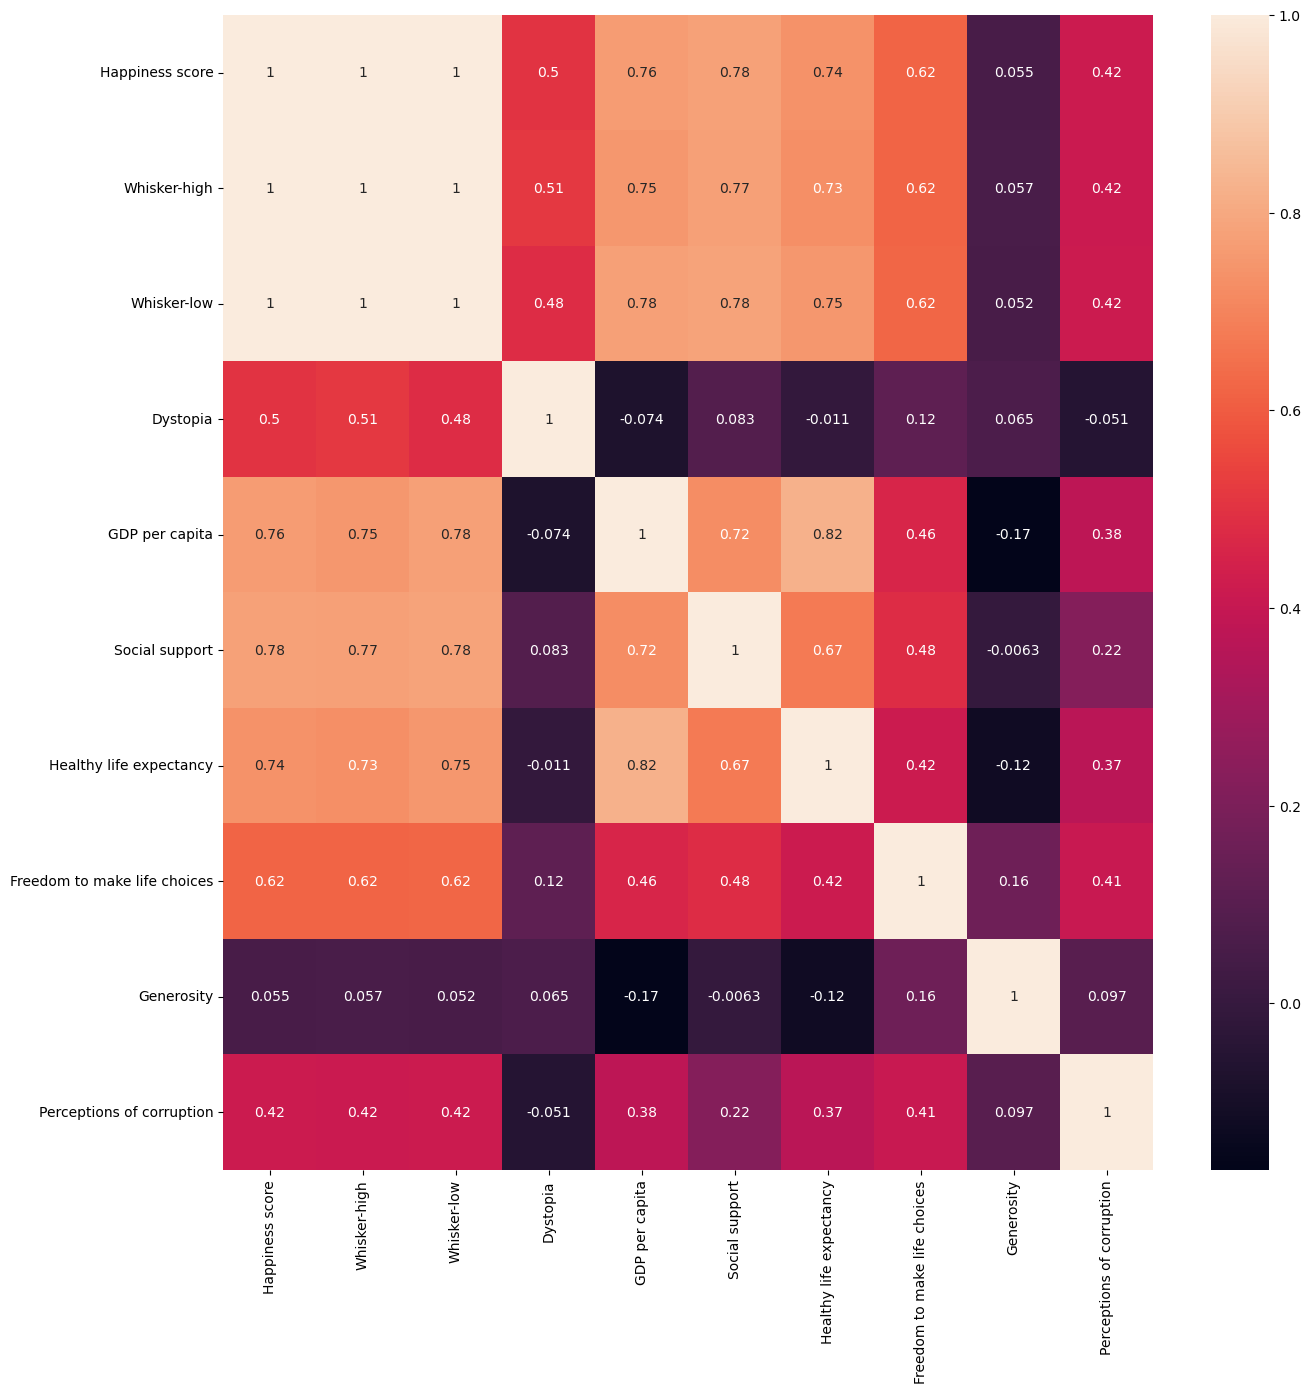

In [18]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True);

# Data Distributions in 2022

In [19]:
df.head(3)

,Country,Happiness score,Whisker-high,Whisker-low,Dystopia,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Region
0,Finland,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534,Western Europe
1,Denmark,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532,Western Europe
2,Iceland,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191,Western Europe


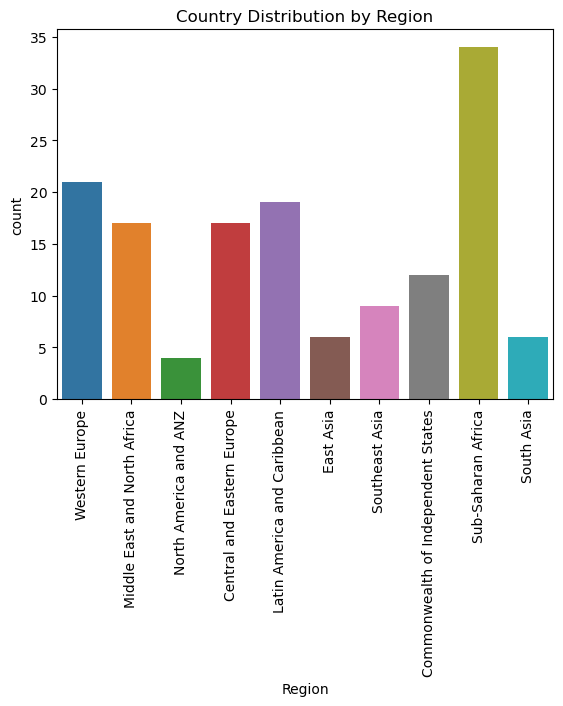

In [20]:
sns.countplot(data = df, x = "Region")
plt.xticks(rotation =90)
plt.title("Country Distribution by Region")
plt.show()

# Happiness score Distribution by Region

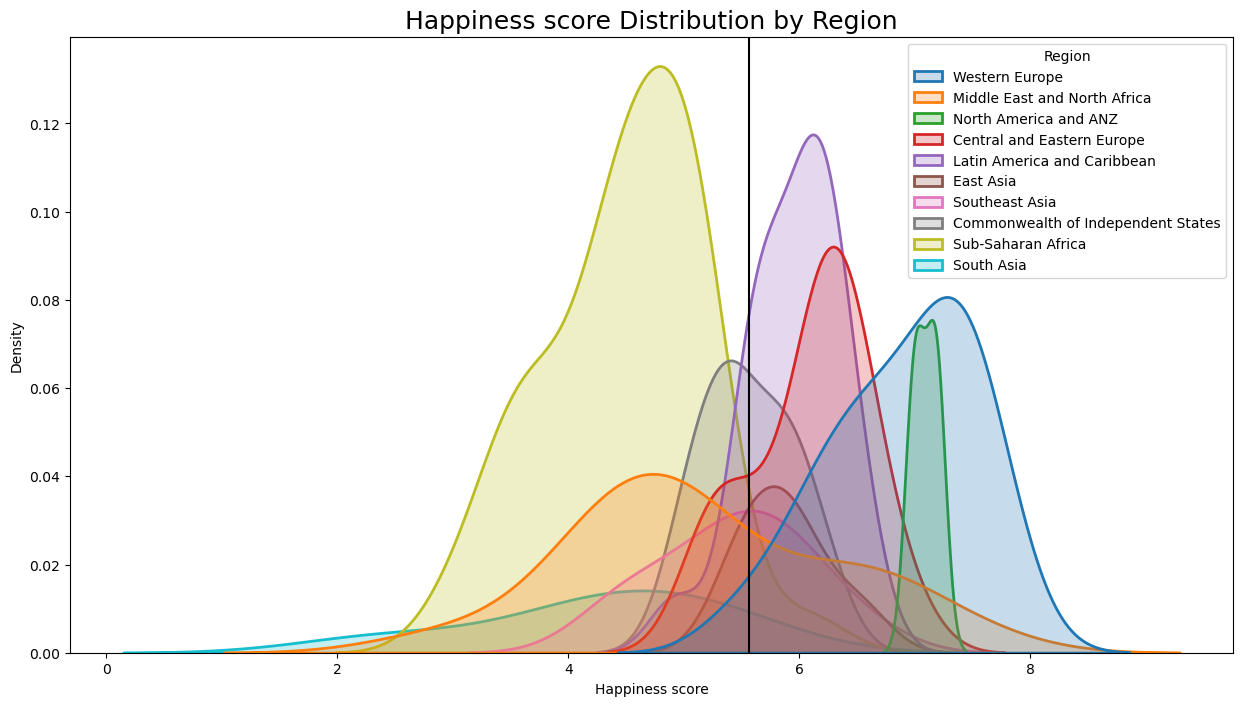

In [21]:
plt.figure(figsize = (15,8))
sns.kdeplot(data = df, x = "Happiness score", hue = "Region", fill = True, linewidth = 2)
plt.axvline(df["Happiness score"].mean(), c = "black")
plt.title("Happiness score Distribution by Region",fontsize = 18)
plt.show()

# Distribution with Boxplot

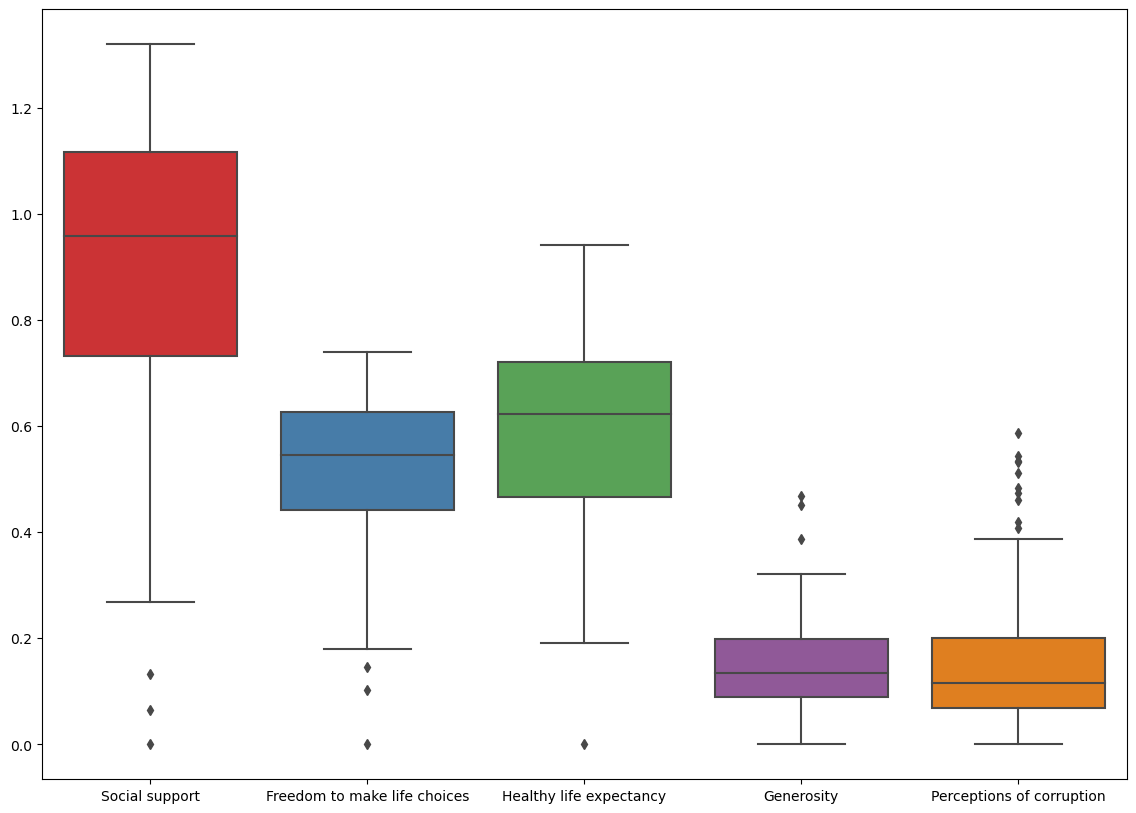

In [22]:
list_features1 = ["Social support", "Freedom to make life choices","Healthy life expectancy", "Generosity", "Perceptions of corruption"]
plt.figure(figsize = (14,10))
sns.boxplot(data = df.loc[:, list_features1], orient = "v", palette = "Set1")
plt.show()

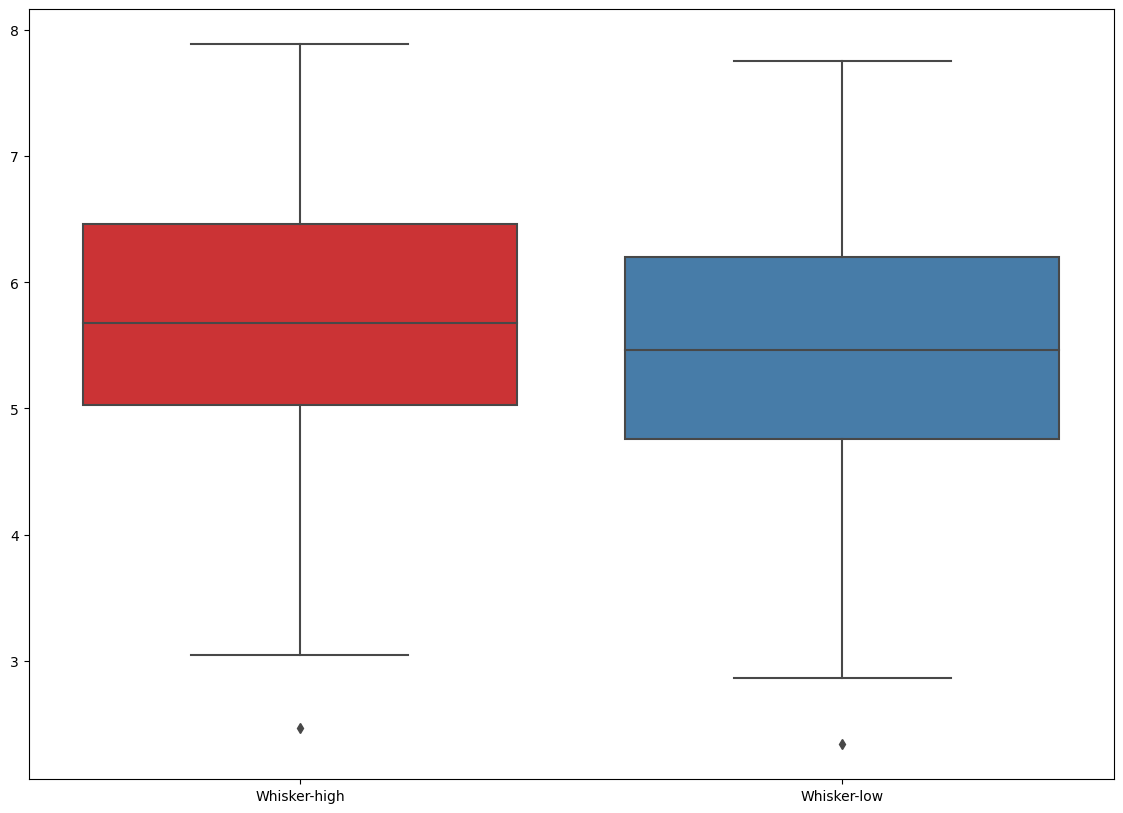

In [23]:
list_features2 = ["Whisker-high", "Whisker-low"]
plt.figure(figsize = (14,10))
sns.boxplot(data = df.loc[:, list_features2], orient = "v", palette = "Set1")
plt.show()

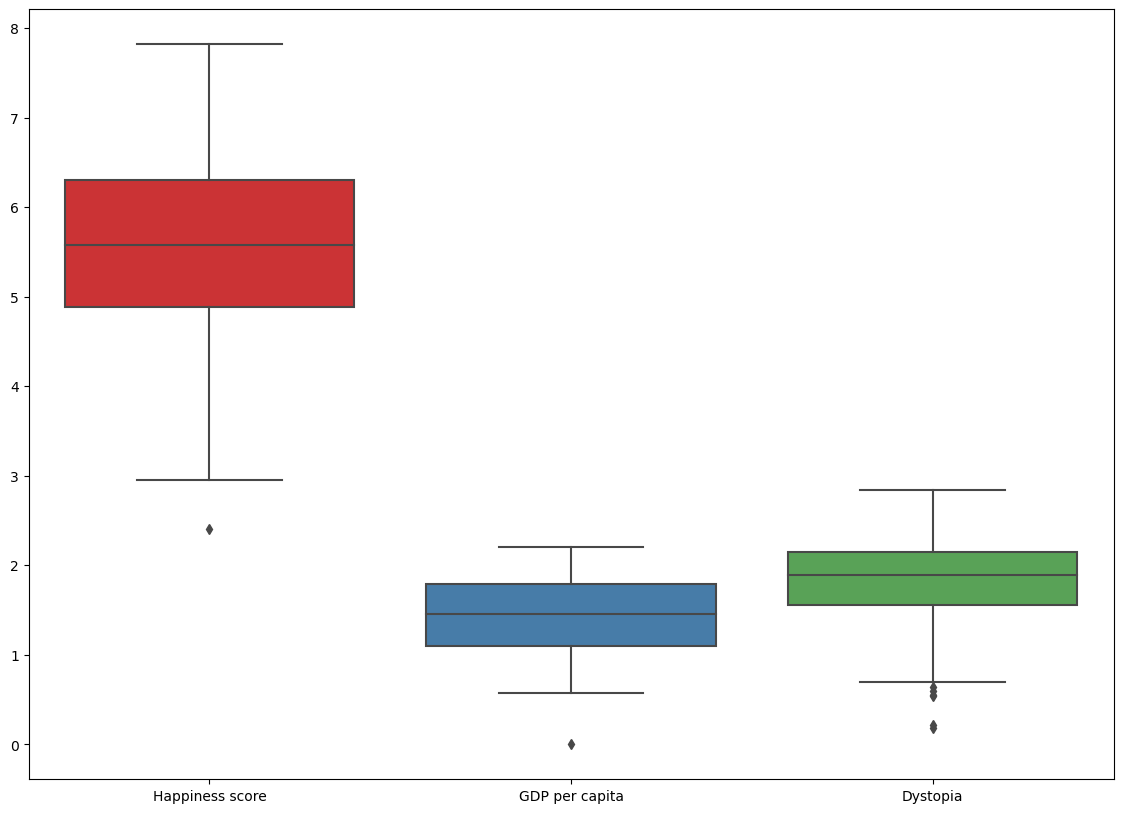

In [24]:
list_features3 = ["Happiness score", "GDP per capita","Dystopia"]
plt.figure(figsize = (14,10))
sns.boxplot(data = df.loc[:, list_features3], orient = "v", palette = "Set1")
plt.show()

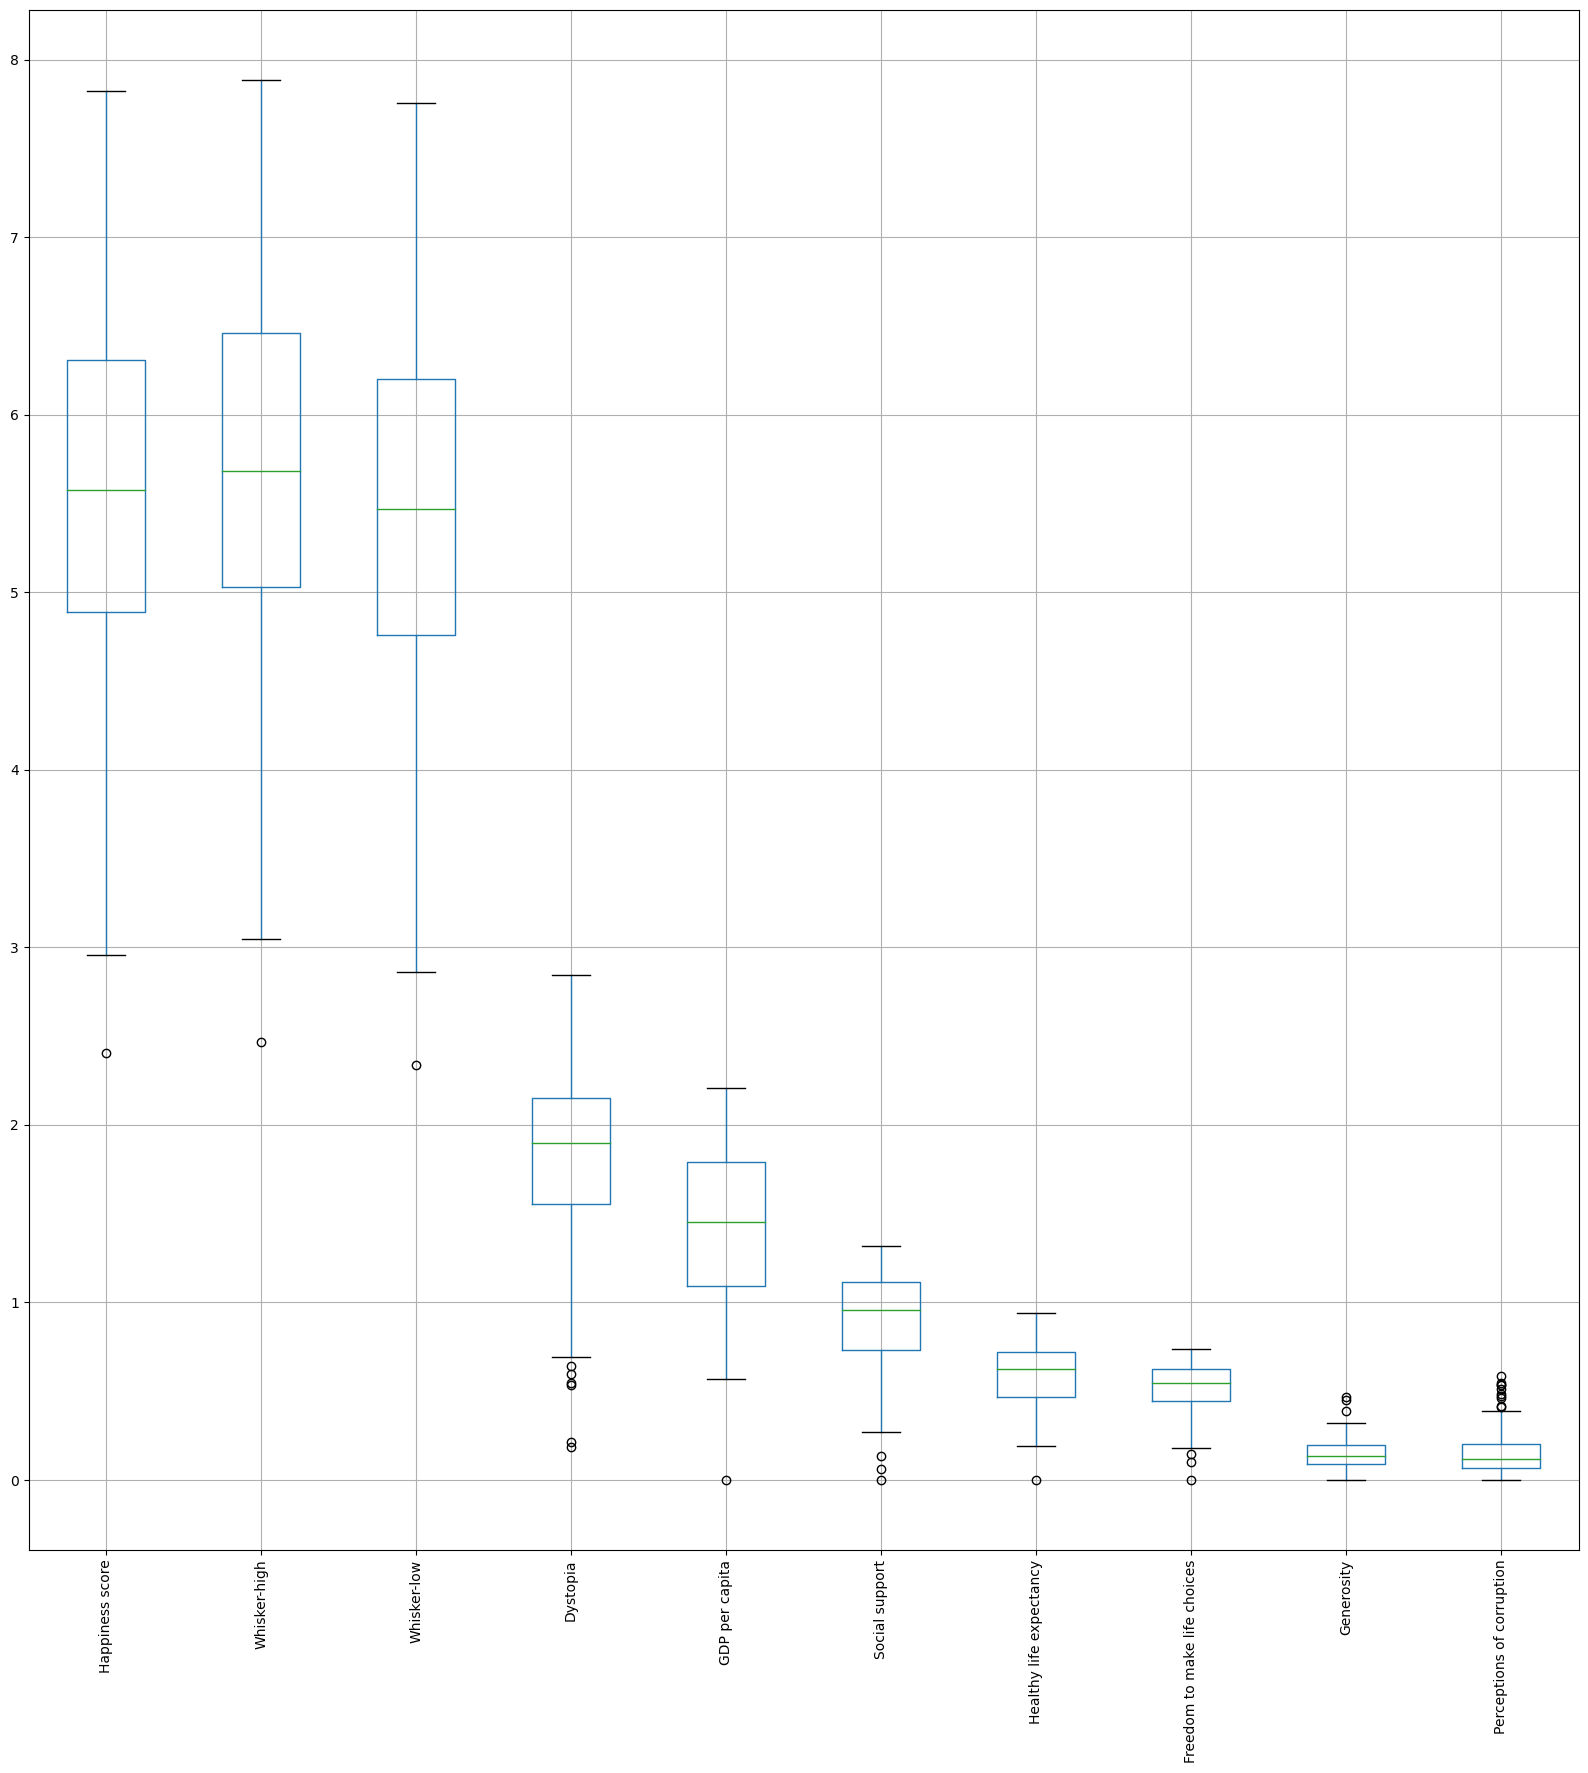

In [25]:
# show all numeric columns as boxplots except for RANK
plt.figure(figsize = (20,20))
df.boxplot()
plt.xticks(rotation = 90);

# Distribution with distplot

In [26]:
numeric_features=['Happiness score', 'Whisker-high', 'Whisker-low',
       'Dystopia', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption']

In [27]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    sns.distplot(df[variable])      
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    print("{} distribution with hist".format(variable))
    plt.show()

Happiness score distribution with hist


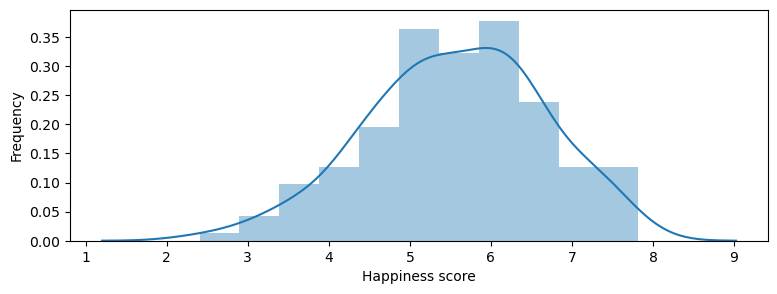

Whisker-high distribution with hist


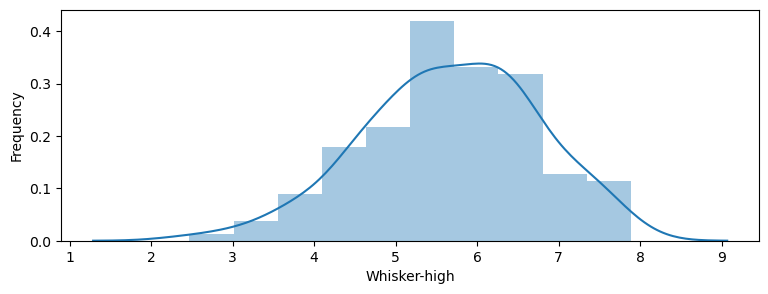

Whisker-low distribution with hist


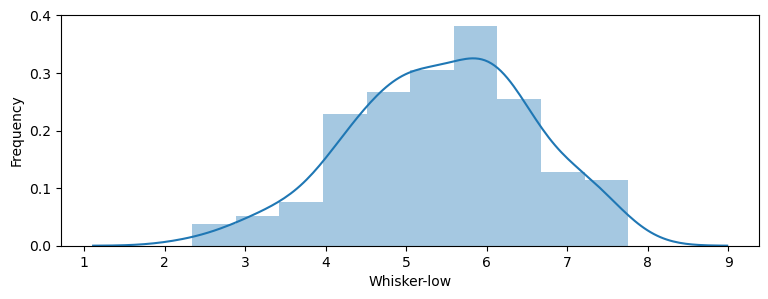

Dystopia distribution with hist


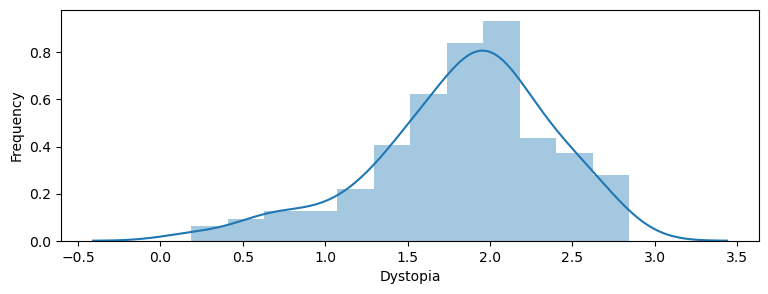

GDP per capita distribution with hist


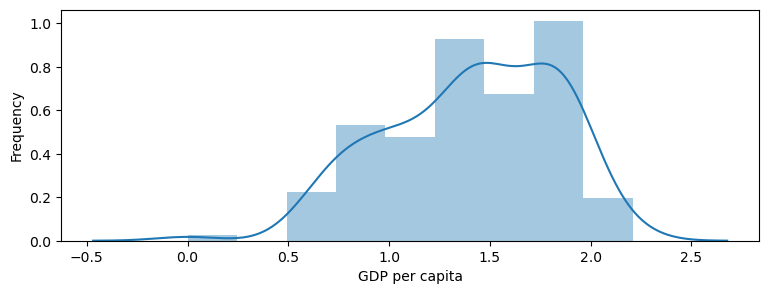

Social support distribution with hist


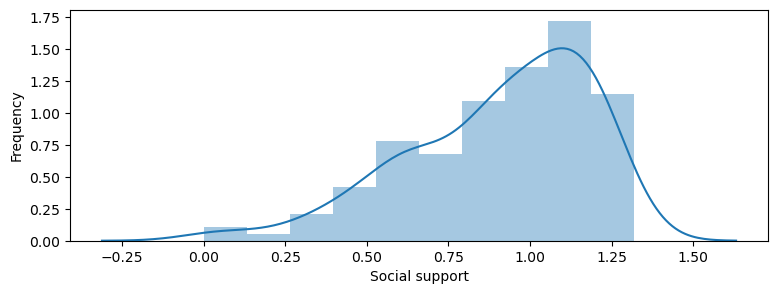

Healthy life expectancy distribution with hist


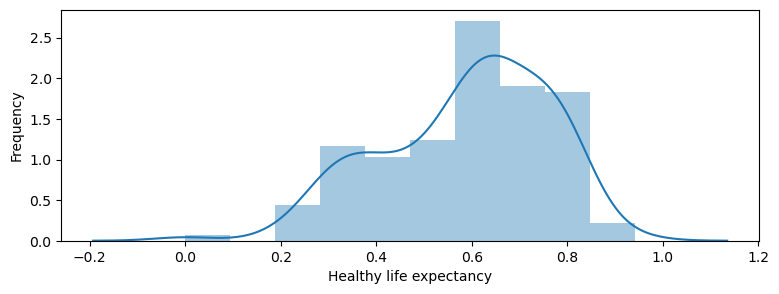

Freedom to make life choices distribution with hist


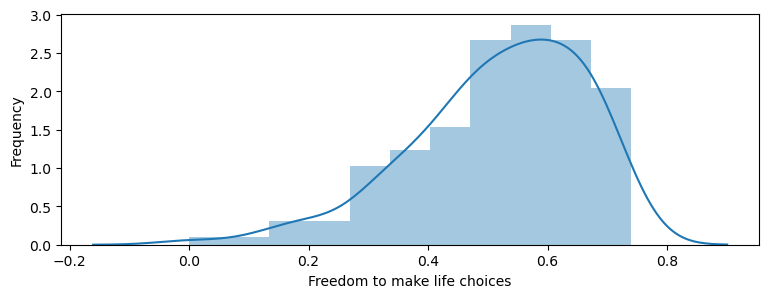

Generosity distribution with hist


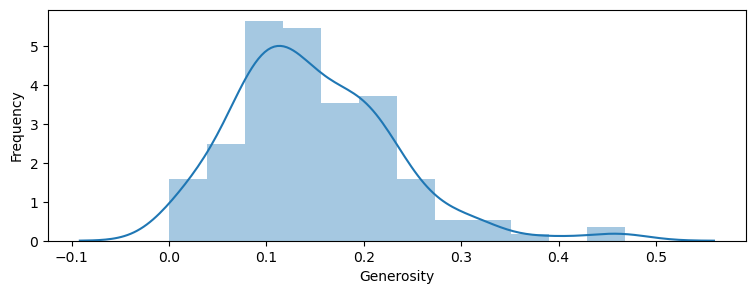

Perceptions of corruption distribution with hist


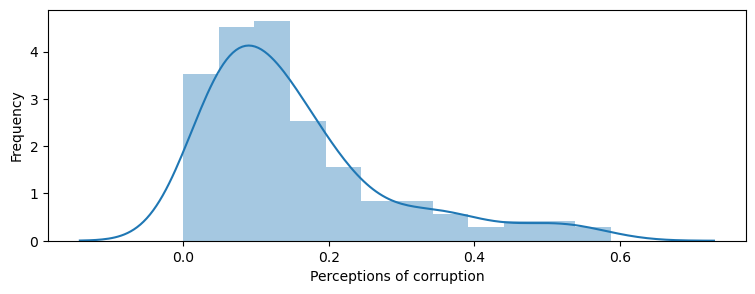

In [28]:
for i in numeric_features:
    plot_hist(i)

From the graphs so far it seems that the mean is almost equal to the mode, so we can say that this data is almost normally distributed
There are only a few main lines that have little impact on the average

# Happiness Score Distribution by Countries in Map View

In [29]:
fig = px.choropleth(data_frame=df,
                    locations="Country",
                    locationmode="country names",
                    color="Happiness score",
                    range_color=(0,9),
                    color_continuous_scale='picnic',
                    title="Happiness Score Map 2022")
fig.show()

# Mean Happiness score of Regions

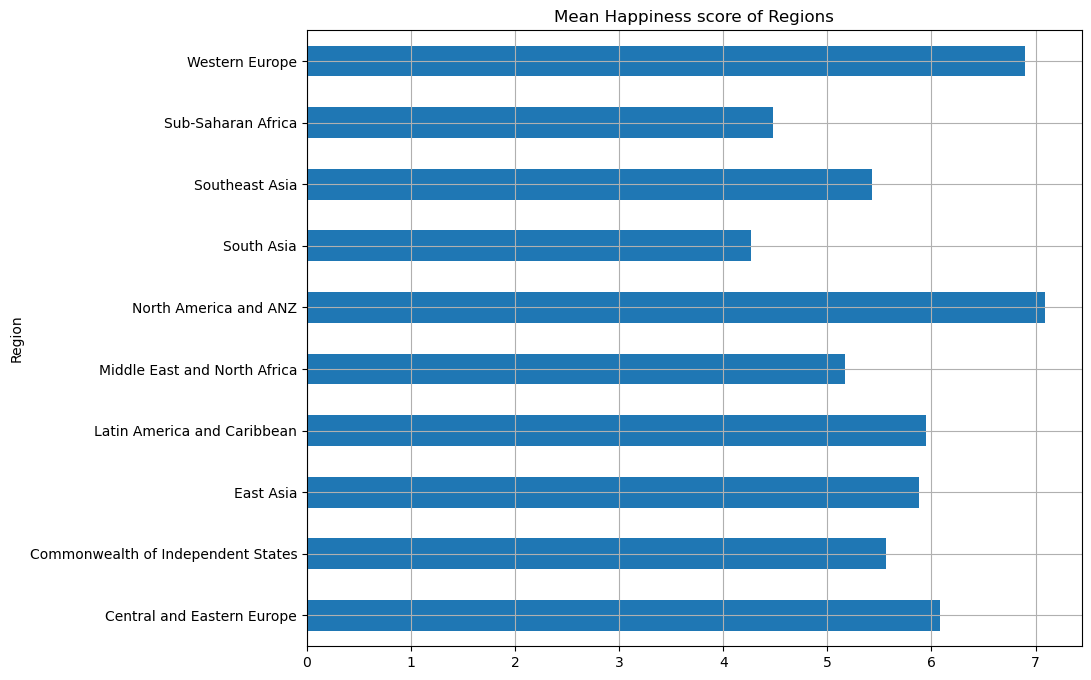

In [30]:
mean_by_region = df.groupby('Region').agg({'Happiness score': 'mean'})
mean_by_region.plot.barh(legend=False, title='Mean Happiness score of Regions', grid=True,figsize=(10,8));

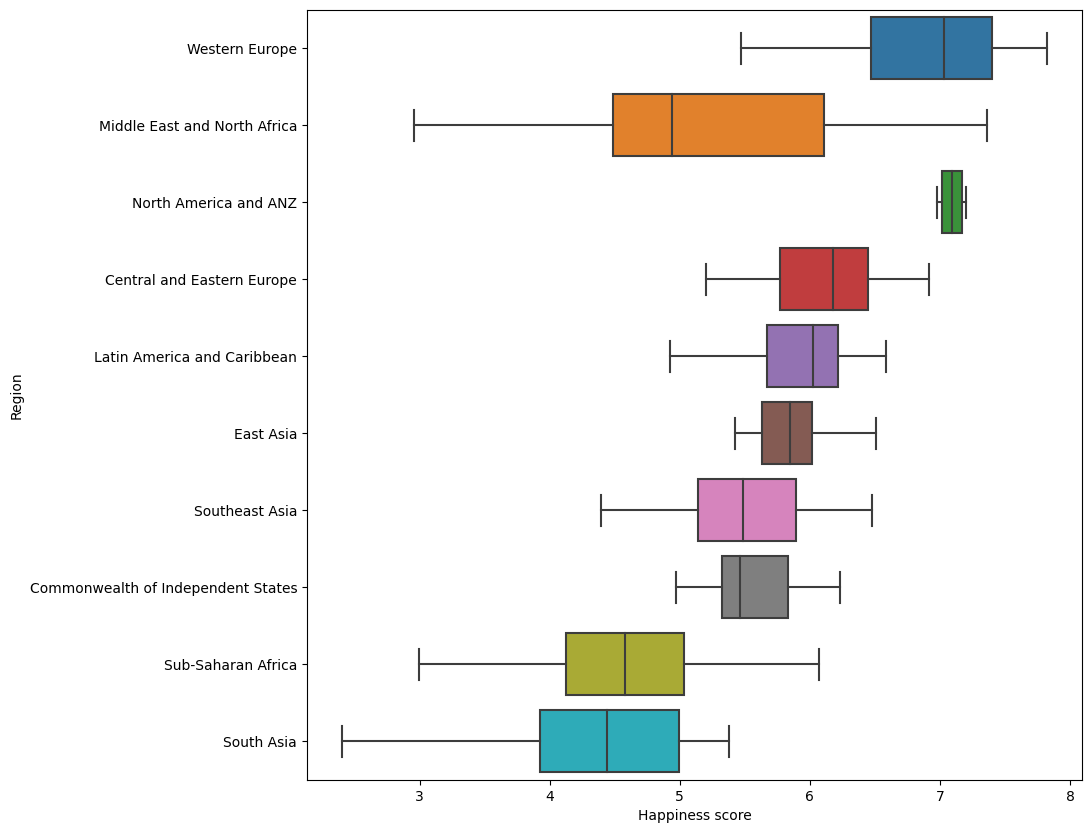

In [31]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(y="Region", x="Happiness score", data=df, orient="h", ax=ax);

In the chart above, we see that North America and ANZ have the highest weighting with the highest average. South Asia and Sub-Saharan Africa reach the lowest average. Both graphs above show more clearly that the happiness scores of each region do not have an almost bell-shaped normal distribution. In some regions, there are also outliers.

In [32]:
some_features = ['Happiness score',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption']

# Analysis of the Top 10 / Last 10 Countries

In [33]:
def top_10(variable):
    plt.figure(figsize=(12,6))
    plt.subplot(1, 2, 1)
    plt.bar(df['Country'][:10],df[variable][:10])
    plt.xticks(rotation = 90)
    plt.ylabel(variable)
    plt.title("Analysis of the Top 10 Countries Analysis")
    plt.grid()
    
    plt.subplot(1, 2, 2)
    plt.bar(df['Country'][-10:],df[variable][-10:])
    plt.xticks(rotation = 90)
    plt.ylabel(variable)
    plt.title("Analysis of the Last 10 Country Analysis")
    plt.grid()
    
    plt.tight_layout()
    plt.show()

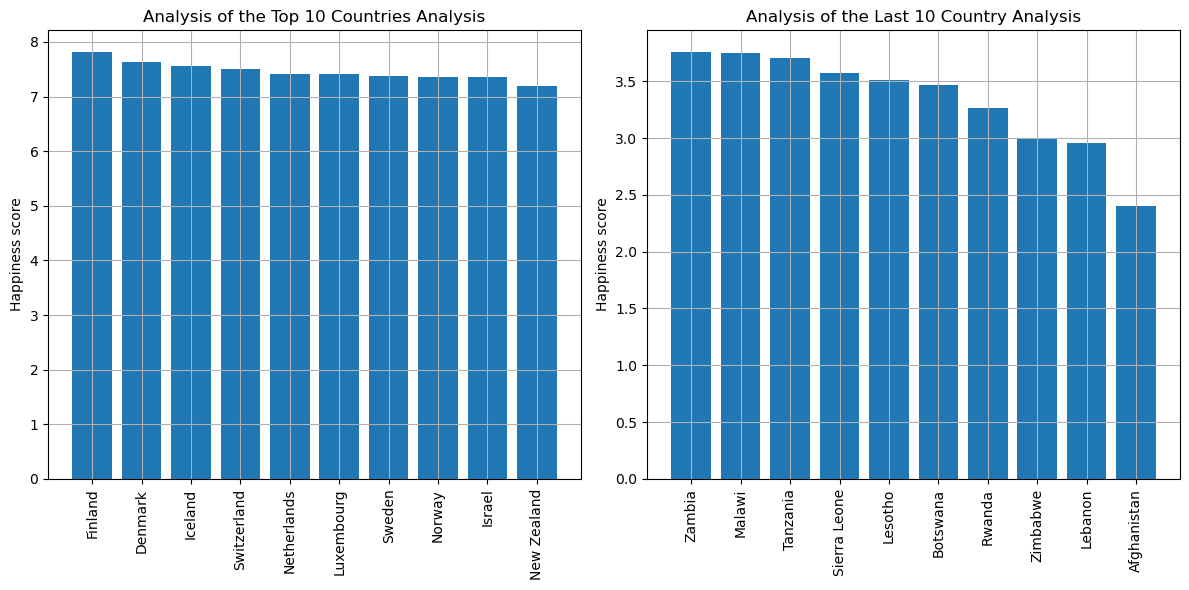

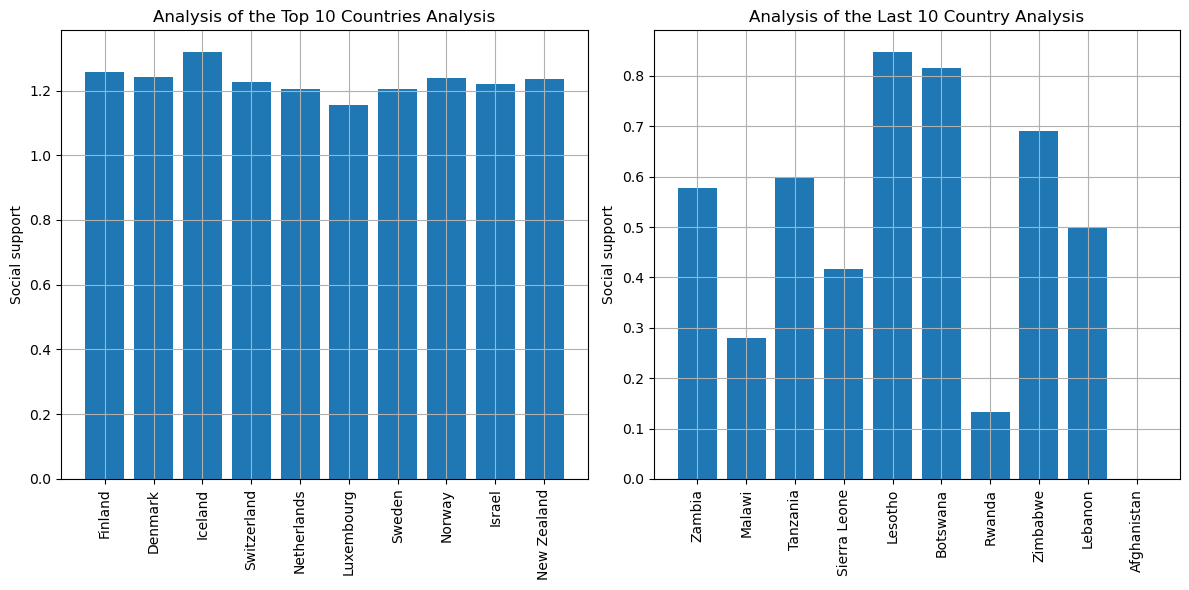

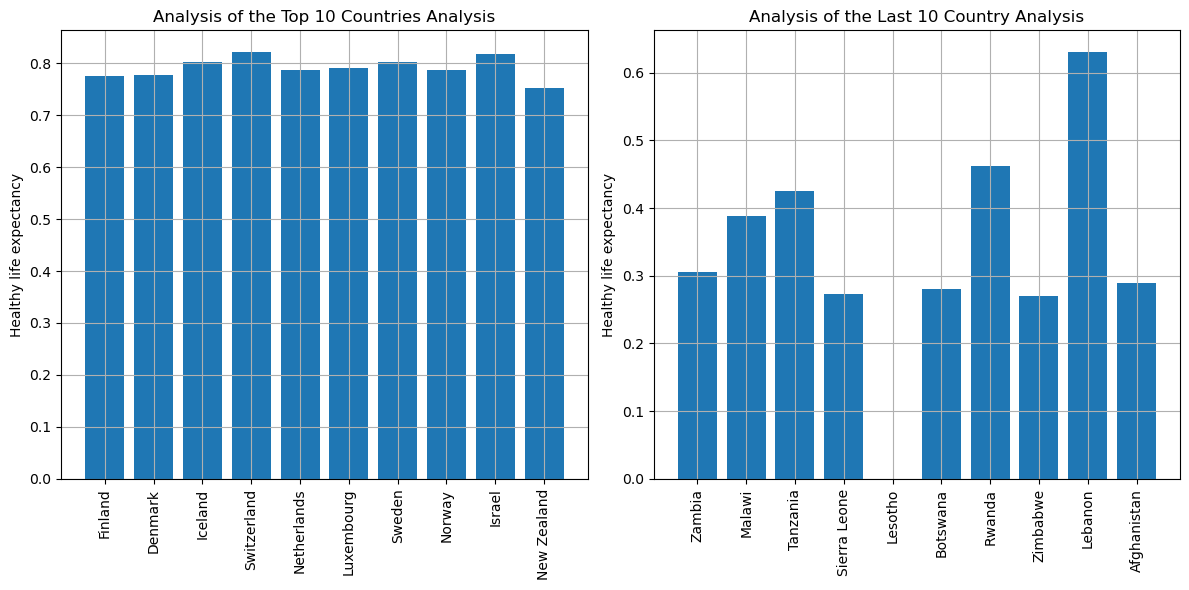

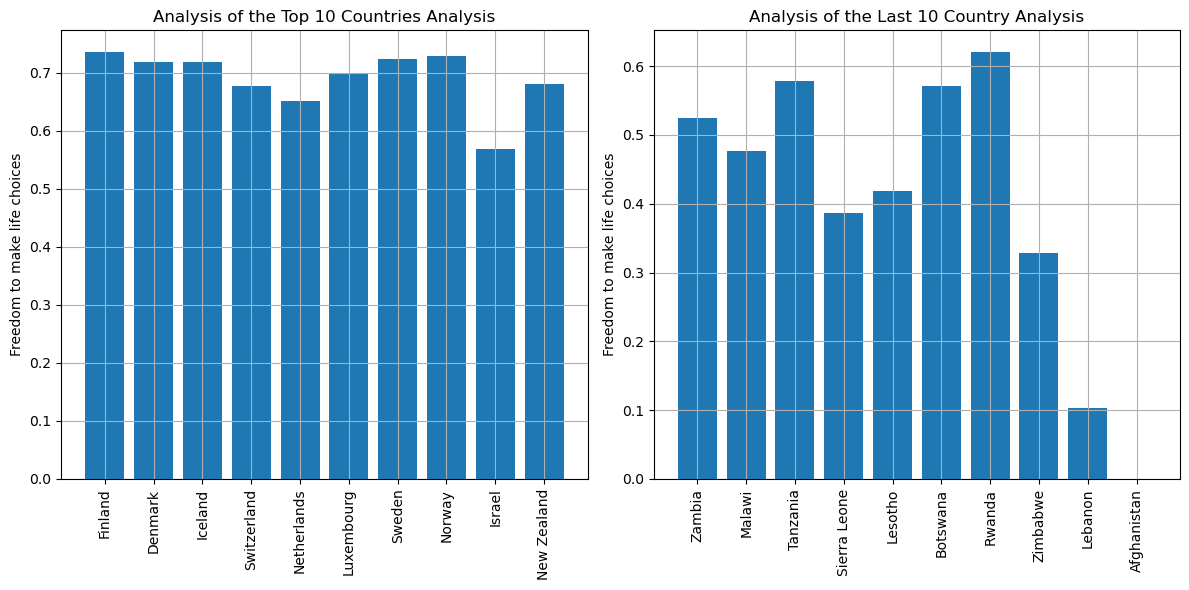

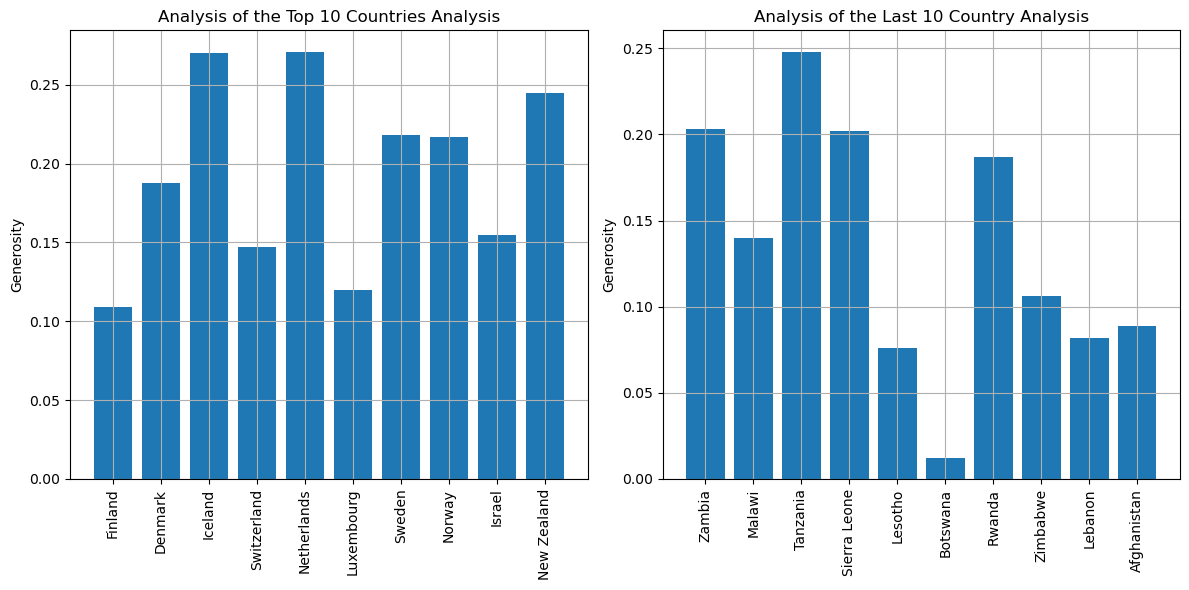

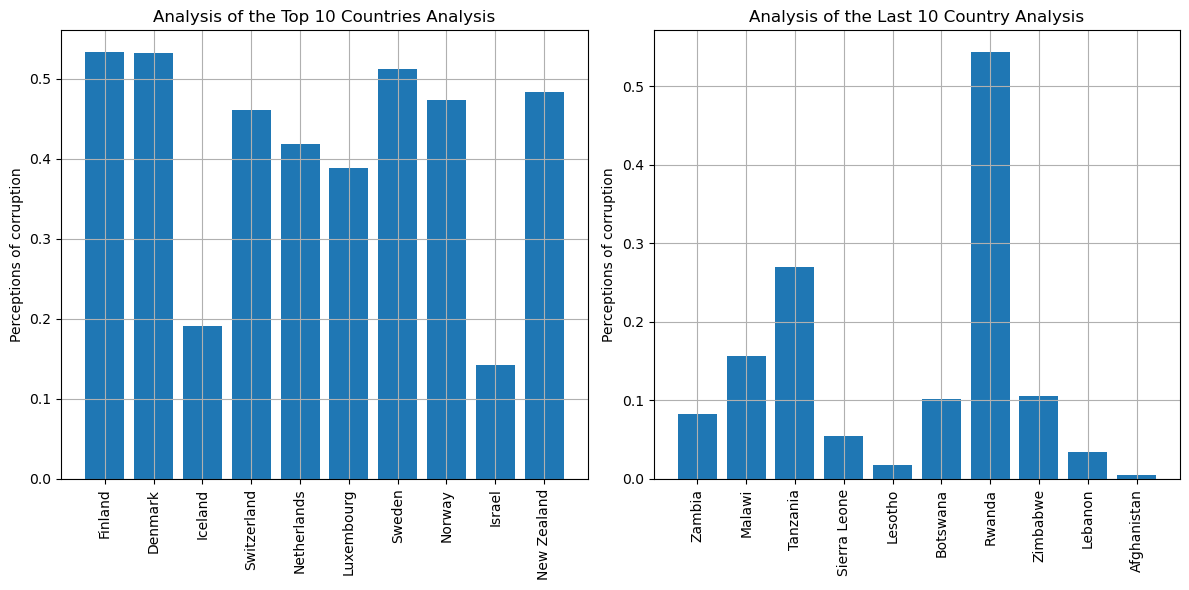

In [34]:
for i in some_features:
    top_10(i)

# Highest and Lowest Observations by Country and Region


In [35]:
print("The happiest country: ",df.nlargest(1, "Happiness score")["Country"].iloc[0])
print("-*-*"*20)
print("The unhappiest country: ",df.nsmallest(1, "Happiness score")["Country"].iloc[0])
print("-*-*"*20)
print("The country with the highest social support: ",df.nlargest(1, "Social support")["Country"].iloc[0])
print("-*-*"*20)
print("The country with lowest social support: ",df.nsmallest(1, "Social support")["Country"].iloc[0])
print("-*-*"*20)
print("The most free country: ",df.nlargest(1, "Freedom to make life choices")["Country"].iloc[0])
print("-*-*"*20)
print("The most unfree country: ",df.nsmallest(1, "Freedom to make life choices")["Country"].iloc[0])
print("-*-*"*20)
print("The country with the highest generosity: ",df.nlargest(1, "Generosity")["Country"].iloc[0])
print("-*-*"*20)
print("The country with the lowest generosity: ",df.nsmallest(1, "Generosity")["Country"].iloc[0])
print("-*-*"*20)
print("The country with the highest healthy life expectancy: ",df.nlargest(1, "Healthy life expectancy")["Country"].iloc[0])
print("-*-*"*20)
print("The country with the highest perception of corruption: ",df.nsmallest(1, "Perceptions of corruption")["Country"].iloc[0])
print("\\"*80)
print("//"*40)
print("The happiest region: ",df.groupby("Region")["Happiness score"].mean().nlargest(1).index[0])
print("-*-*"*20)
print("The unhappiest region: ",df.groupby("Region")["Happiness score"].mean().nsmallest(1).index[0])
print("-*-*"*20)
print("The most generous region: ",df.groupby("Region")["Generosity"].mean().nlargest(1).index[0])
print("-*-*"*20)
print("The most free region: ",df.groupby("Region")["Freedom to make life choices"].mean().nlargest(1).index[0])
print("-*-*"*20)
print("The most unfree region: ",df.groupby("Region")["Freedom to make life choices"].mean().nsmallest(1).index[0])
print("-*-*"*20)
print("The region with lowest social support: ",df.groupby("Region")["Social support"].mean().nsmallest(1).index[0])
print("-*-*"*20)
print("The region with the lowest perception of corruption: ",df.groupby("Region")["Perceptions of corruption"].mean().nsmallest(1).index[0])
print("-*-*"*20)
print("The region with the highest healthy life expectancy: ",df.groupby("Region")["Healthy life expectancy"].mean().nlargest(1).index[0])
print("-*-*"*20)
print("The region with the lowest healthy life expectancy: ",df.groupby("Region")["Healthy life expectancy"].mean().nsmallest(1).index[0])
print("-*-*"*20)

The happiest country:  Finland
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
The unhappiest country:  Afghanistan
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
The country with the highest social support:  Iceland
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
The country with lowest social support:  Afghanistan
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
The most free country:  Cambodia
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
The most unfree country:  Afghanistan
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
The country with the highest generosity:  Indonesia
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
The country with the lowest generosity:  Georgia
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
The c